<a href="https://colab.research.google.com/github/charujhagrawat20/StackIt/blob/main/Prac5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Training MLP (Hidden Size: 4, Rate: 0.2) ---
Epoch 1000/10000, Mean Squared Error: 0.248035
Epoch 2000/10000, Mean Squared Error: 0.169159
Epoch 3000/10000, Mean Squared Error: 0.021750
Epoch 4000/10000, Mean Squared Error: 0.006509
Epoch 5000/10000, Mean Squared Error: 0.003493
Epoch 6000/10000, Mean Squared Error: 0.002317
Epoch 7000/10000, Mean Squared Error: 0.001709
Epoch 8000/10000, Mean Squared Error: 0.001344
Epoch 9000/10000, Mean Squared Error: 0.001101
Epoch 10000/10000, Mean Squared Error: 0.000930

--- Training Complete ---

--- Testing Model Predictions ---
Input: [0 0], Output: 0.0299, Predicted Class: 0, Expected: 0 (Correct)
Input: [0 1], Output: 0.9702, Predicted Class: 1, Expected: 1 (Correct)
Input: [1 0], Output: 0.9703, Predicted Class: 1, Expected: 1 (Correct)
Input: [1 1], Output: 0.0325, Predicted Class: 0, Expected: 0 (Correct)


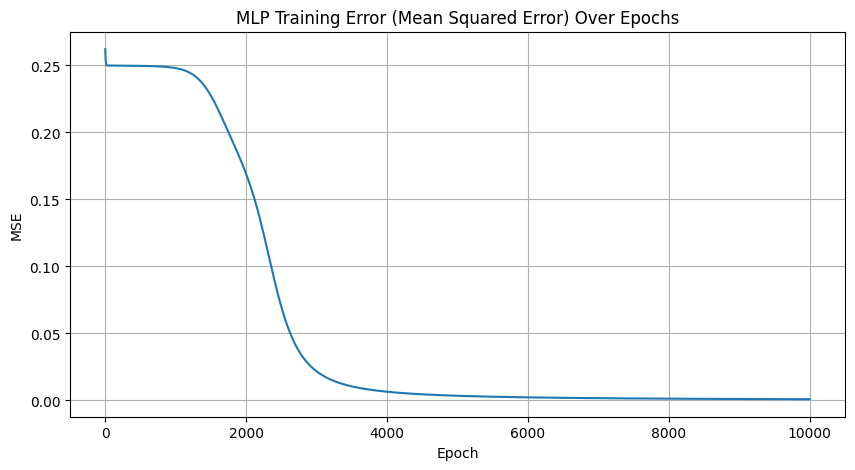

In [3]:
import numpy as np
def sigmoid(x):
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(output):
    return output * (1 - output)
class MLP_Backpropagation:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1, max_epochs=10000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.W_ih = np.random.uniform(low=-0.5, high=0.5, size=(input_size, hidden_size))
        self.b_h = np.zeros((1, hidden_size)) # Bias for hidden layer
        self.W_ho = np.random.uniform(low=-0.5, high=0.5, size=(hidden_size, output_size))
        self.b_o = np.zeros((1, output_size)) # Bias for output layer
        self.errors = [] # To track mean squared erro
    def forward_pass(self, X):
        self.net_h = np.dot(X, self.W_ih) + self.b_h
        self.out_h = sigmoid(self.net_h)
        self.net_o = np.dot(self.out_h, self.W_ho) + self.b_o
        self.out_o = sigmoid(self.net_o)
        return self.out_o
    def backward_pass(self, X, y, out_o, out_h):
        error_o = y - out_o
        d_o = error_o * sigmoid_derivative(out_o)
        error_h = d_o.dot(self.W_ho.T)
        d_h = error_h * sigmoid_derivative(out_h)
        self.W_ho += self.out_h.T.dot(d_o) * self.learning_rate
        self.b_o += np.sum(d_o, axis=0, keepdims=True) * self.learning_rate
        self.W_ih += X.T.dot(d_h) * self.learning_rate
        self.b_h += np.sum(d_h, axis=0, keepdims=True) * self.learning_rate
        return np.mean(error_o**2)
    def train(self, X_train, y_train):
        print(f"--- Training MLP (Hidden Size: {self.hidden_size}, Rate: {self.learning_rate}) ---")
        for epoch in range(self.max_epochs):
            out_o = self.forward_pass(X_train)
            mse = self.backward_pass(X_train, y_train, out_o, self.out_h)
            self.errors.append(mse)
            if (epoch + 1) % 1000 == 0:
                print(f"Epoch {epoch + 1}/{self.max_epochs}, Mean Squared Error: {mse:.6f}")
        print("\n--- Training Complete ---")
X_train = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y_train = np.array([
    [0],
    [1],
    [1],
    [0]
])
mlp = MLP_Backpropagation(
    input_size=2,
    hidden_size=4,
    output_size=1,
    learning_rate=0.2,
    max_epochs=10000
)
mlp.train(X_train, y_train)
print("\n--- Testing Model Predictions ---")
predictions = mlp.forward_pass(X_train)
for inputs, prediction, expected in zip(X_train, predictions, y_train):
    predicted_class = 1 if prediction[0] >= 0.5 else 0
    status = "Correct" if predicted_class == expected[0] else "Incorrect"
    print(f"Input: {inputs}, Output: {prediction[0]:.4f}, Predicted Class: {predicted_class}, Expected: {expected[0]} ({status})")
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(mlp.errors)
plt.title('MLP Training Error (Mean Squared Error) Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.grid(True)
plt.show()